In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/car market.csv')
data.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [ ]:
data.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [ ]:
data.isnull().any()

,0
ID,False
Name,False
Price,False
Brand,False
Model,False
Variant,False
Series,False
Year,False
Kilometers,False
Type,False


In [ ]:
data.isnull().sum()

,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?


In [ ]:
avg = data.groupby('Brand')['Price'].mean()

In [ ]:
avg_sorted = avg.sort_values(ascending=False)
print(avg_sorted)

Brand
Lamborghini        452923.333333
Aston Martin       235120.000000
Bentley            181405.428571
Porsche            153987.835165
Chevrolet          145833.857143
Ram                105055.956522
FPV                 91490.000000
Maserati            84859.750000
HSV                 74036.162162
Genesis             64888.000000
Land Rover          64485.186813
Mercedes-Benz       63490.852800
Cupra               62334.200000
Jaguar              61976.394737
BMW                 56373.000000
Iveco               52990.000000
Audi                52605.027027
Volvo               52159.484472
Lexus               50281.566667
Alfa Romeo          49282.545455
Hino                46500.000000
Isuzu               42962.951311
Toyota              40719.680997
Jeep                39098.102902
GWM                 38250.793103
Volkswagen          38100.763494
Skoda               37865.675000
LDV                 37798.696721
Abarth              37493.800000
Ford                36091.152349
Chry

2) How does the condition of a car (Status) affect its price?


In [ ]:
avg_price = data.groupby('Status')['Price'].mean()

In [ ]:
print(avg_price)

Status
Demo            67307.576227
New In Stock    55703.207283
Used            35638.707250
Name: Price, dtype: float64


3) Is there a correlation between mileage (Kilometers) and the price of a car?


Correlation between Mileage and Price: -0.4474897290060361


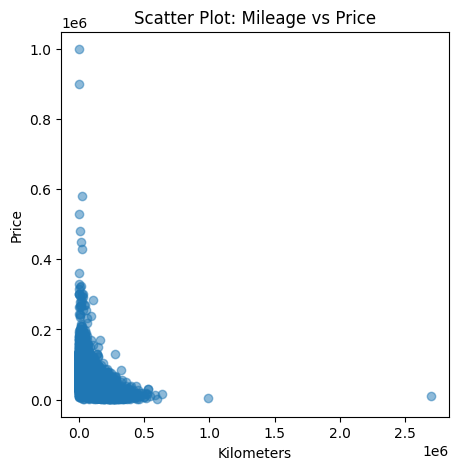

In [ ]:
correlation = data['Kilometers'].corr(data['Price'])
print(f"Correlation between Mileage and Price: {correlation}")
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(data['Kilometers'], data['Price'], alpha=0.5)
plt.title('Scatter Plot: Mileage vs Price')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()

4) How does engine capacity (CC) relate to car price and mileage?



In [ ]:
data['CC'] = pd.to_numeric(data['CC'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

fuel_mapping = {'Unleaded Petrol': 1, 'Diesel': 2}
data['Fuel_Numeric'] = data['Fuel'].map(fuel_mapping)

correlation_matrix = data[['CC', 'Price', 'Fuel_Numeric']].corr()

print(correlation_matrix)

                    CC     Price  Fuel_Numeric
CC            1.000000  0.298205      0.177639
Price         0.298205  1.000000      0.413184
Fuel_Numeric  0.177639  0.413184      1.000000
